DATA OVERVIEW

1.Import the libraries - Load the data - Check the structure of the data - Check the types of the data - Check for and treat (if needed) missing values - Check the statistical summary - Check for and treat (if needed) data irregularities - Observations and Insights.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
path= 'C:\\Users\\ssnan\\Downloads\\austo_automobile.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [7]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [12]:
df.shape

(1581, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [16]:
df.isnull().sum().sum()

159

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [20]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

There are missing values in categorical column Gender and numerical column Partner_salary.

For treating the missing values in Gender.

In [24]:
df["Gender"].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [26]:
df["Gender"].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [28]:
df["Gender"]=df["Gender"].replace("Femal","Female")
df["Gender"]=df["Gender"].replace("Femle","Female")

In [30]:
df["Gender"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1581 entries, 0 to 1580
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
1528 non-null   object
dtypes: object(1)
memory usage: 12.5+ KB


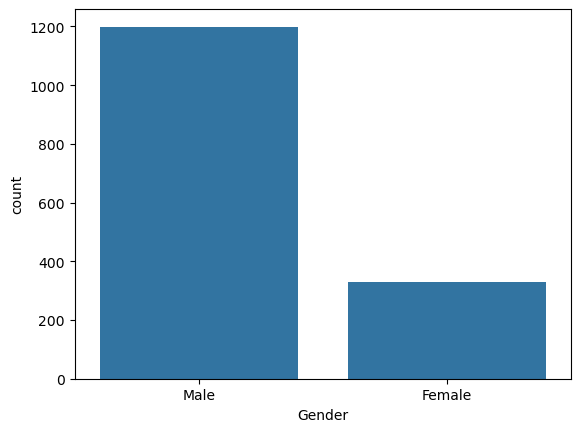

In [32]:
sns.countplot(data=df,x="Gender");

In [33]:
#since Gender is a categorical variable we have to use mode to fill the null values.
mode_value = df["Gender"].mode()[0]

In [34]:
df["Gender"].fillna(mode_value, inplace=True)

C:\Users\ssnan\AppData\Local\Temp\ipykernel_16644\2782722799.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(mode_value, inplace=True)


In [36]:
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

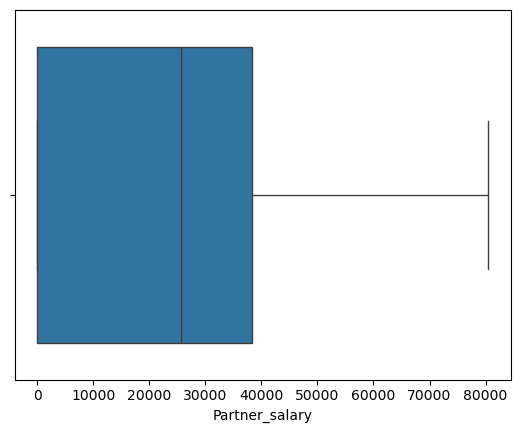

In [40]:
#Now we are left with numerical column Partner_Salary with null values.
#checking for missing values in Partner_Salary
sns.boxplot(data=df,x="Partner_salary");

In [41]:
#there are no outliers present in the Partner_salary.
#hence we fill the null values with mean.
df.Partner_salary=df.Partner_salary.fillna(df.Partner_salary.mean())

In [44]:
df.Partner_salary.isnull().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


Now the DataFrame df has no null values.

In [49]:
#to check further irregularities in the DataFrame
#to check and drop if there are duplicate rows present.
df.duplicated().sum()

0

In [51]:
#to convert the data type of the Partner_salary to int.
#since both total salary and salary are in int and partner salary = total salary-salary
df["Partner_salary"]= df["Partner_salary"].astype("int64")

In [53]:
df_num = df.select_dtypes(["int64"])
df_cat = df.select_dtypes(["object"])

In [55]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1581 non-null   int64
 1   No_of_Dependents  1581 non-null   int64
 2   Salary            1581 non-null   int64
 3   Partner_salary    1581 non-null   int64
 4   Total_salary      1581 non-null   int64
 5   Price             1581 non-null   int64
dtypes: int64(6)
memory usage: 74.2 KB


In [57]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1581 non-null   object
 1   Profession       1581 non-null   object
 2   Marital_status   1581 non-null   object
 3   Education        1581 non-null   object
 4   Personal_loan    1581 non-null   object
 5   House_loan       1581 non-null   object
 6   Partner_working  1581 non-null   object
 7   Make             1581 non-null   object
dtypes: object(8)
memory usage: 98.9+ KB


In [59]:
dfnew=pd.concat([df_num,df_cat],axis=1,join="inner")

In [61]:
dfnew.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,53,4,99300,70700,170000,61000,Male,Business,Married,Post Graduate,No,No,Yes,SUV
1,53,4,95500,70300,165800,61000,Female,Salaried,Married,Post Graduate,Yes,No,Yes,SUV
2,53,3,97300,60700,158000,57000,Female,Salaried,Married,Post Graduate,No,No,Yes,SUV
3,53,2,72500,70300,142800,61000,Female,Salaried,Married,Graduate,Yes,No,Yes,SUV
4,53,3,79700,60200,139900,57000,Male,Salaried,Married,Post Graduate,No,No,Yes,SUV


In [63]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   No_of_Dependents  1581 non-null   int64 
 2   Salary            1581 non-null   int64 
 3   Partner_salary    1581 non-null   int64 
 4   Total_salary      1581 non-null   int64 
 5   Price             1581 non-null   int64 
 6   Gender            1581 non-null   object
 7   Profession        1581 non-null   object
 8   Marital_status    1581 non-null   object
 9   Education         1581 non-null   object
 10  Personal_loan     1581 non-null   object
 11  House_loan        1581 non-null   object
 12  Partner_working   1581 non-null   object
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.1+ KB


In [65]:
#Checking if there is any data irregularities in any column per se.

In [67]:
dfnew["Age"].unique()

array([53, 52, 50, 49, 47, 46, 45, 51, 54, 48, 44, 43, 42, 41, 40, 39, 38,
       37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22],
      dtype=int64)

In [69]:
dfnew["Profession"].unique()

array(['Business', 'Salaried'], dtype=object)

In [71]:
dfnew["Marital_status"].unique()

array(['Married', 'Single'], dtype=object)

In [73]:
dfnew["Education"].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [75]:
dfnew["Make"].unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

hence now there are no irregularities in the data set.

In [78]:
dfnew["Age"].value_counts()

Age
28    119
25    118
30    117
29    110
24    104
23    103
27     97
26     96
22     94
39     41
35     41
44     40
38     38
36     35
45     34
42     34
43     34
33     33
37     31
32     30
52     28
41     27
40     25
34     24
46     22
31     21
53     19
47     15
49     15
51     14
50      9
54      8
48      5
Name: count, dtype: int64

In [80]:
dfnew["Gender"].value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

In [82]:
dfnew["Profession"].value_counts()

Profession
Salaried    896
Business    685
Name: count, dtype: int64

In [84]:
dfnew["Marital_status"].value_counts()

Marital_status
Married    1443
Single      138
Name: count, dtype: int64

In [86]:
dfnew["Education"].value_counts()

Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64

In [88]:
dfnew["Make"].value_counts()

Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64

In [90]:
dfnew["Personal_loan"].value_counts()

Personal_loan
Yes    792
No     789
Name: count, dtype: int64

In [92]:
dfnew["House_loan"].value_counts()

House_loan
No     1054
Yes     527
Name: count, dtype: int64

In [94]:
dfnew["Partner_working"].value_counts()

Partner_working
Yes    868
No     713
Name: count, dtype: int64

2.Univariate Analysis
- Explore all the variables (categorical and numerical) in the data - Check for and treat (if needed) outliers - Observations and Insight.s

#Exploring the numerical variables.

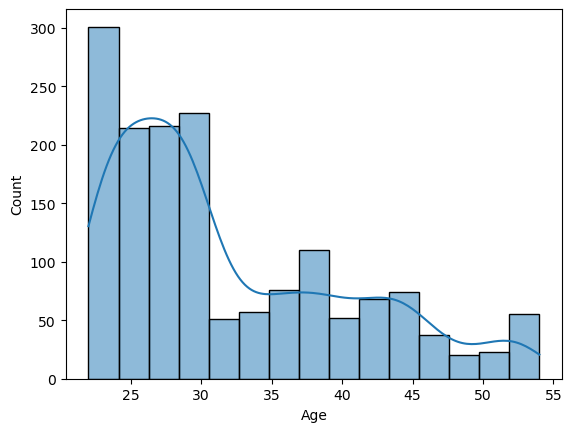

In [98]:
sns.histplot(data=dfnew,x="Age",kde=True)
plt.show()


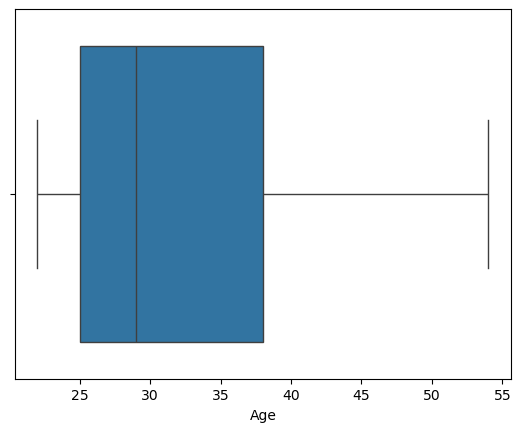

In [99]:
sns.boxplot(data=dfnew,x="Age")
plt.show()

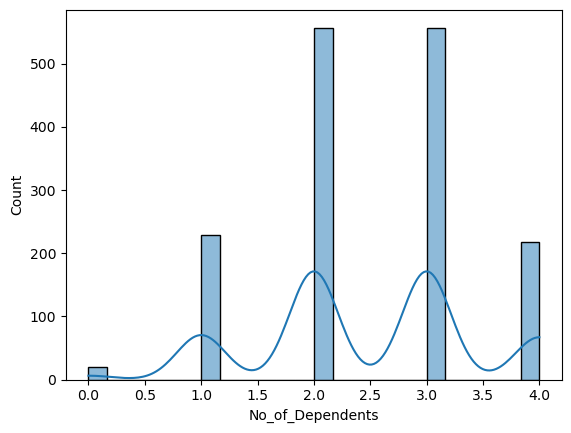

In [100]:
sns.histplot(data=dfnew,x="No_of_Dependents",kde=True)
plt.show()


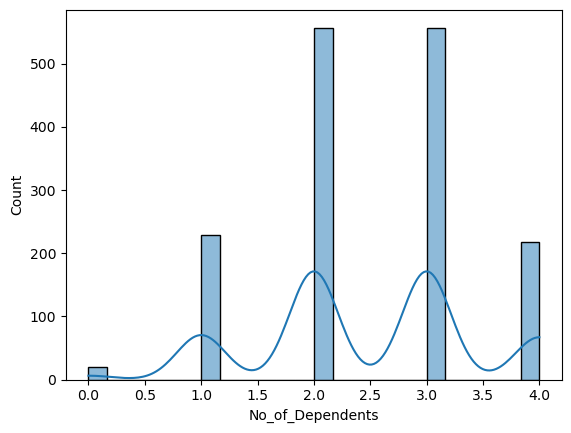

In [101]:
sns.histplot(data=dfnew,x="No_of_Dependents",kde=True)
plt.show()

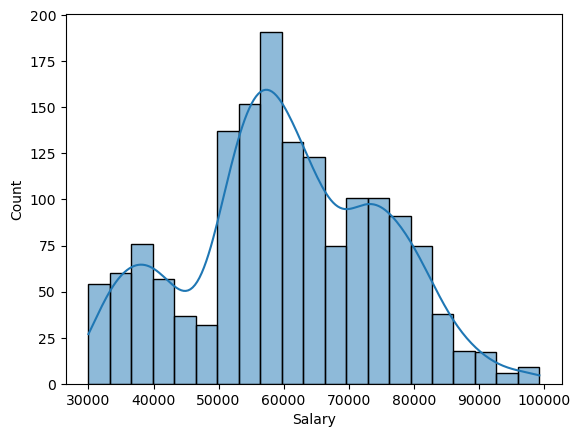

In [103]:
sns.histplot(data=dfnew,x="Salary",kde=True)
plt.show()

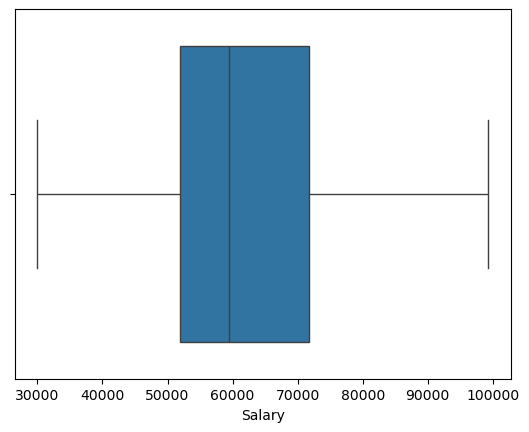

In [104]:
sns.boxplot(data=dfnew,x="Salary")
plt.show()

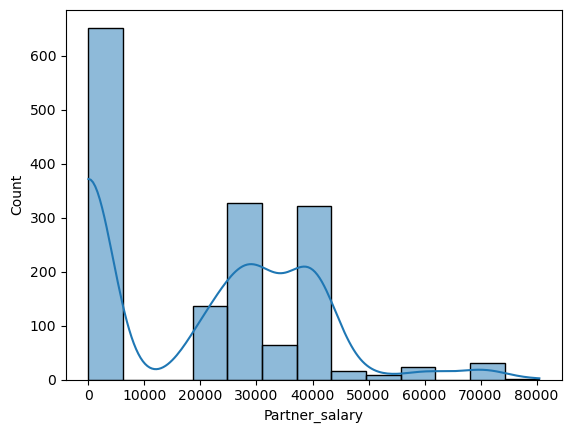

In [106]:
sns.histplot(data=dfnew,x="Partner_salary",kde=True)
plt.show()

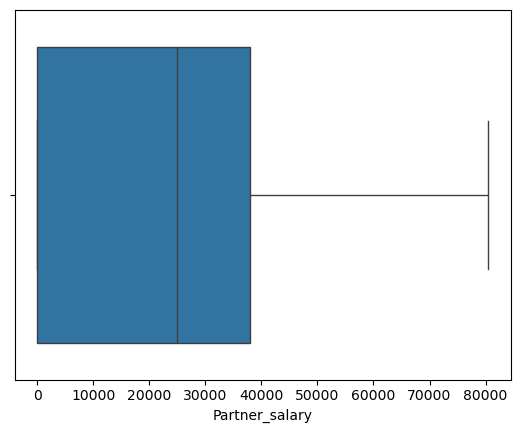

In [107]:
sns.boxplot(data=dfnew,x="Partner_salary")
plt.show()

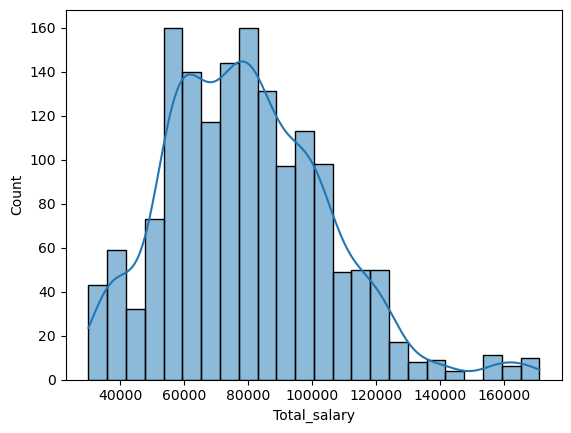

In [109]:
sns.histplot(data=dfnew,x="Total_salary",kde=True)
plt.show()

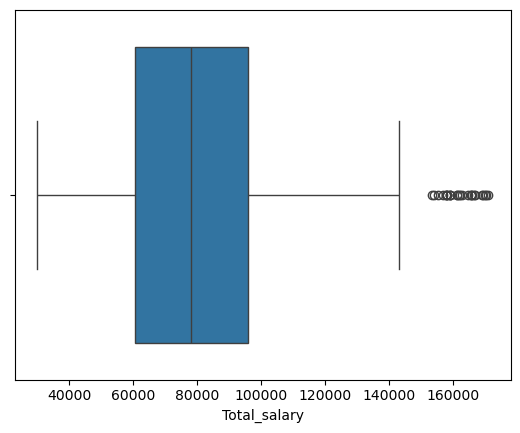

In [110]:
sns.boxplot(data=dfnew,x="Total_salary")
plt.show()

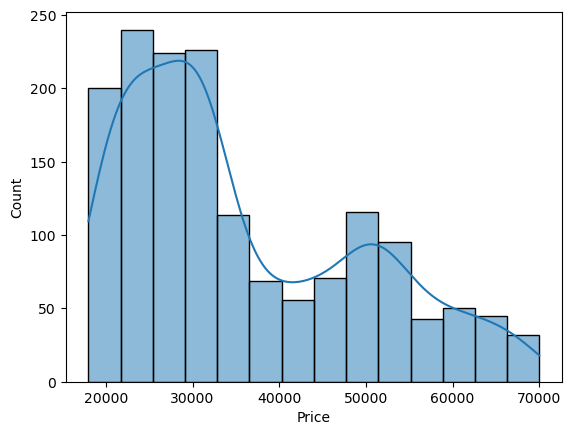

In [111]:
sns.histplot(data=dfnew,x="Price",kde=True)
plt.show()

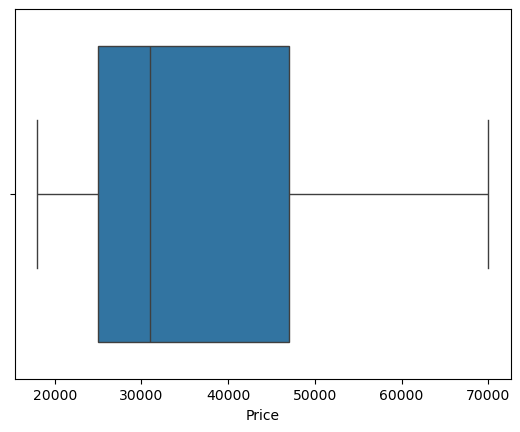

In [113]:
sns.boxplot(data=dfnew,x="Price")
plt.show()

#Exploring the categorical variables

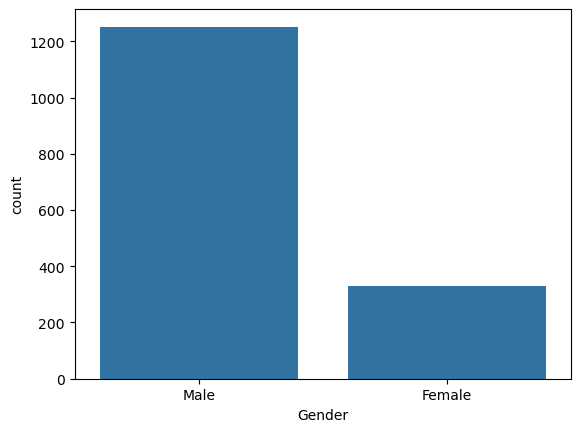

In [115]:
sns.countplot(data=dfnew,x="Gender")
plt.show()

In [117]:
df["Gender"].value_counts(normalize=True)*100

Gender
Male      79.190386
Female    20.809614
Name: proportion, dtype: float64

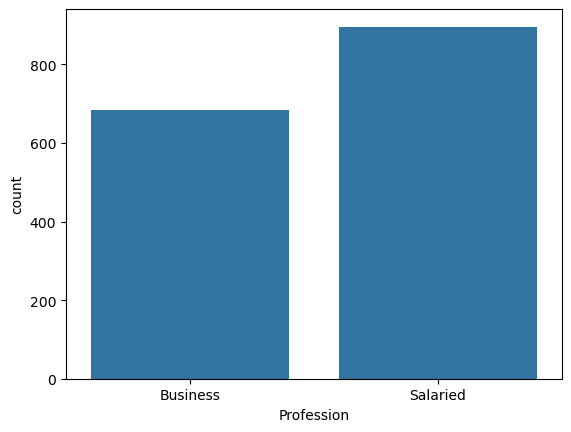

In [118]:
sns.countplot(data=dfnew,x="Profession")
plt.show()

In [120]:
df["Profession"].value_counts(normalize=True)*100

Profession
Salaried    56.672992
Business    43.327008
Name: proportion, dtype: float64

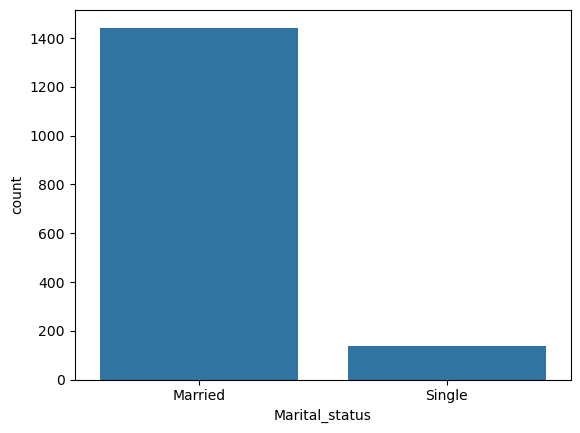

In [121]:
sns.countplot(data=dfnew,x="Marital_status")
plt.show()

In [122]:
df["Marital_status"].value_counts(normalize=True)*100

Marital_status
Married    91.271347
Single      8.728653
Name: proportion, dtype: float64

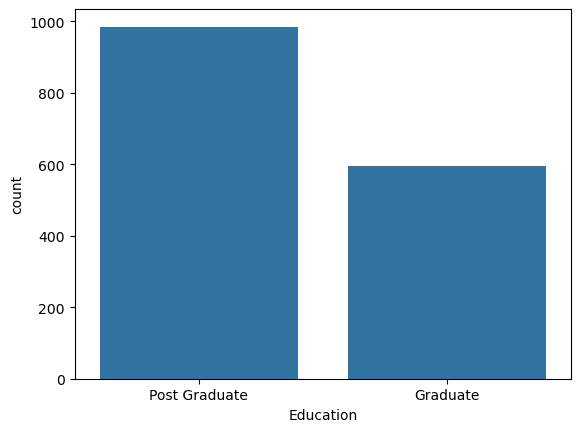

In [124]:
sns.countplot(data=dfnew,x="Education")
plt.show()

In [125]:
df["Education"].value_counts(normalize=True)*100

Education
Post Graduate    62.30234
Graduate         37.69766
Name: proportion, dtype: float64

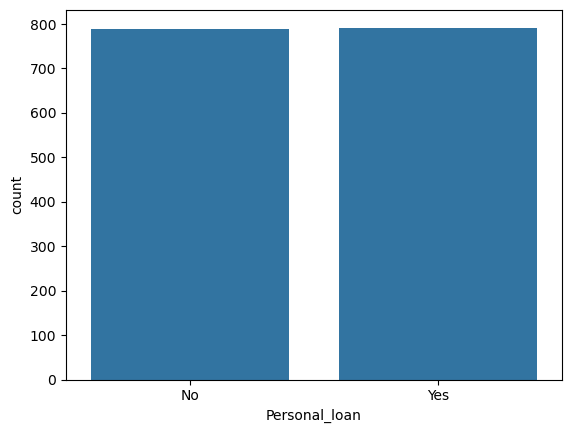

In [127]:
sns.countplot(data=dfnew,x="Personal_loan")
plt.show()

In [128]:
df["Personal_loan"].value_counts(normalize=True)*100

Personal_loan
Yes    50.094877
No     49.905123
Name: proportion, dtype: float64

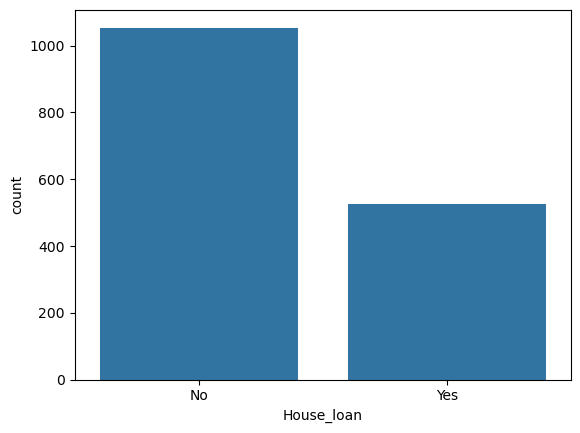

In [129]:
sns.countplot(data=dfnew,x="House_loan")
plt.show()

In [131]:
df["House_loan"].value_counts(normalize=True)*100

House_loan
No     66.666667
Yes    33.333333
Name: proportion, dtype: float64

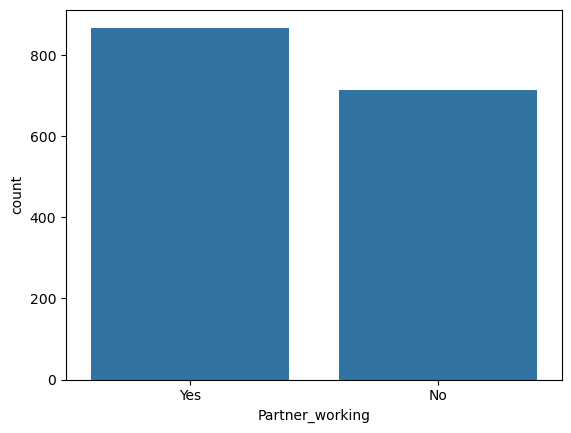

In [132]:
sns.countplot(data=dfnew,x="Partner_working")
plt.show()

In [134]:
df["Partner_working"].value_counts(normalize=True)*100

Partner_working
Yes    54.901961
No     45.098039
Name: proportion, dtype: float64

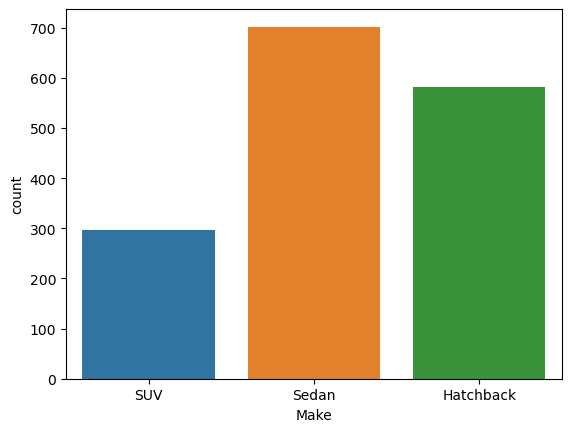

In [135]:
sns.countplot(data=dfnew,x="Make",hue="Make")
plt.show()

In [137]:
df["Make"].value_counts(normalize=True)*100

Make
Sedan        44.402277
Hatchback    36.812144
SUV          18.785579
Name: proportion, dtype: float64

Bivariate Analysis
- Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical vs numerical variables

In [140]:
#Relationship between all numerical variables

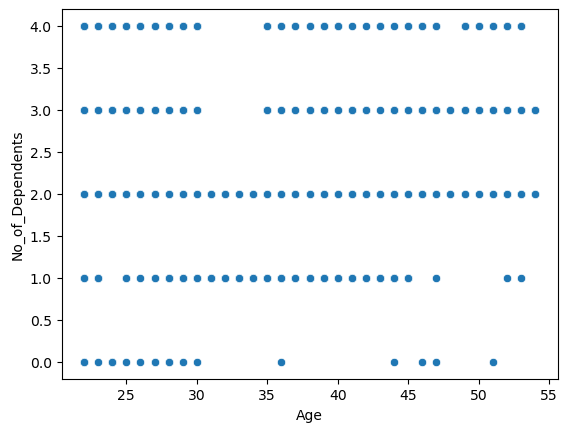

In [141]:
sns.scatterplot(data=dfnew,x="Age",y="No_of_Dependents")
plt.show()

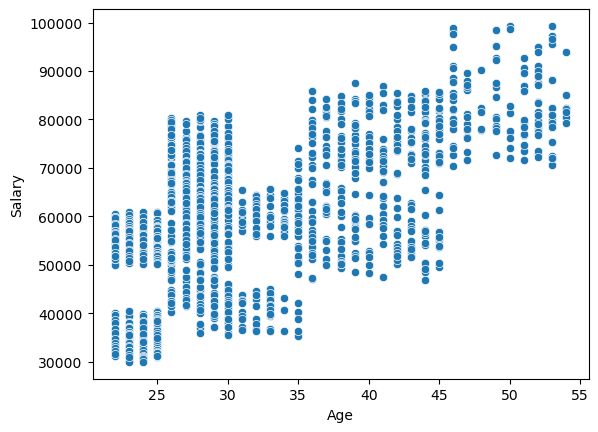

In [144]:
sns.scatterplot(data=dfnew,x="Age",y="Salary")
plt.show()

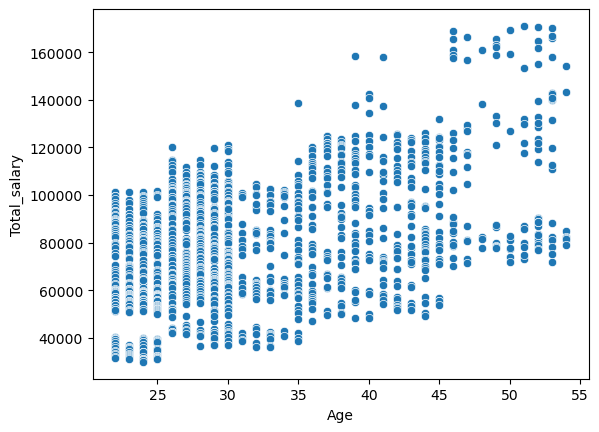

In [145]:
sns.scatterplot(data=dfnew,x="Age",y="Total_salary")
plt.show()

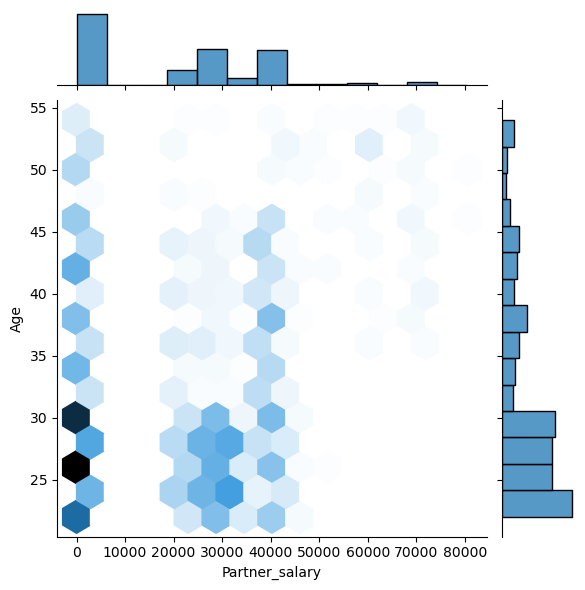

In [148]:
sns.jointplot(data=dfnew,x="Partner_salary",y="Age",kind="hex")
plt.show()

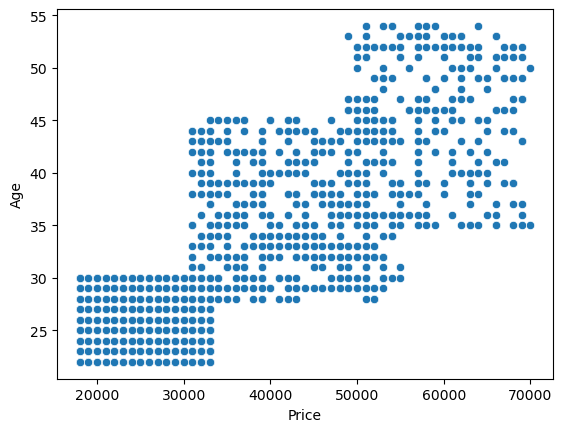

In [149]:
sns.scatterplot(data=dfnew,x="Price",y="Age")
plt.show()

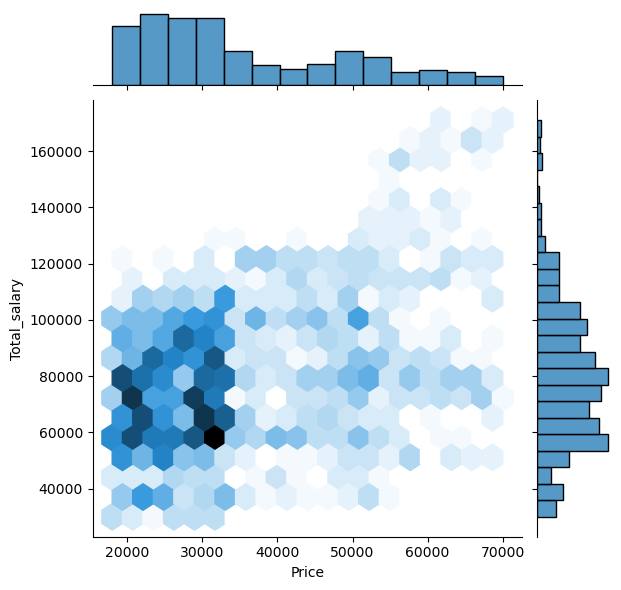

In [152]:
sns.jointplot(data=dfnew,x="Price",y="Total_salary",kind="hex")
plt.show()

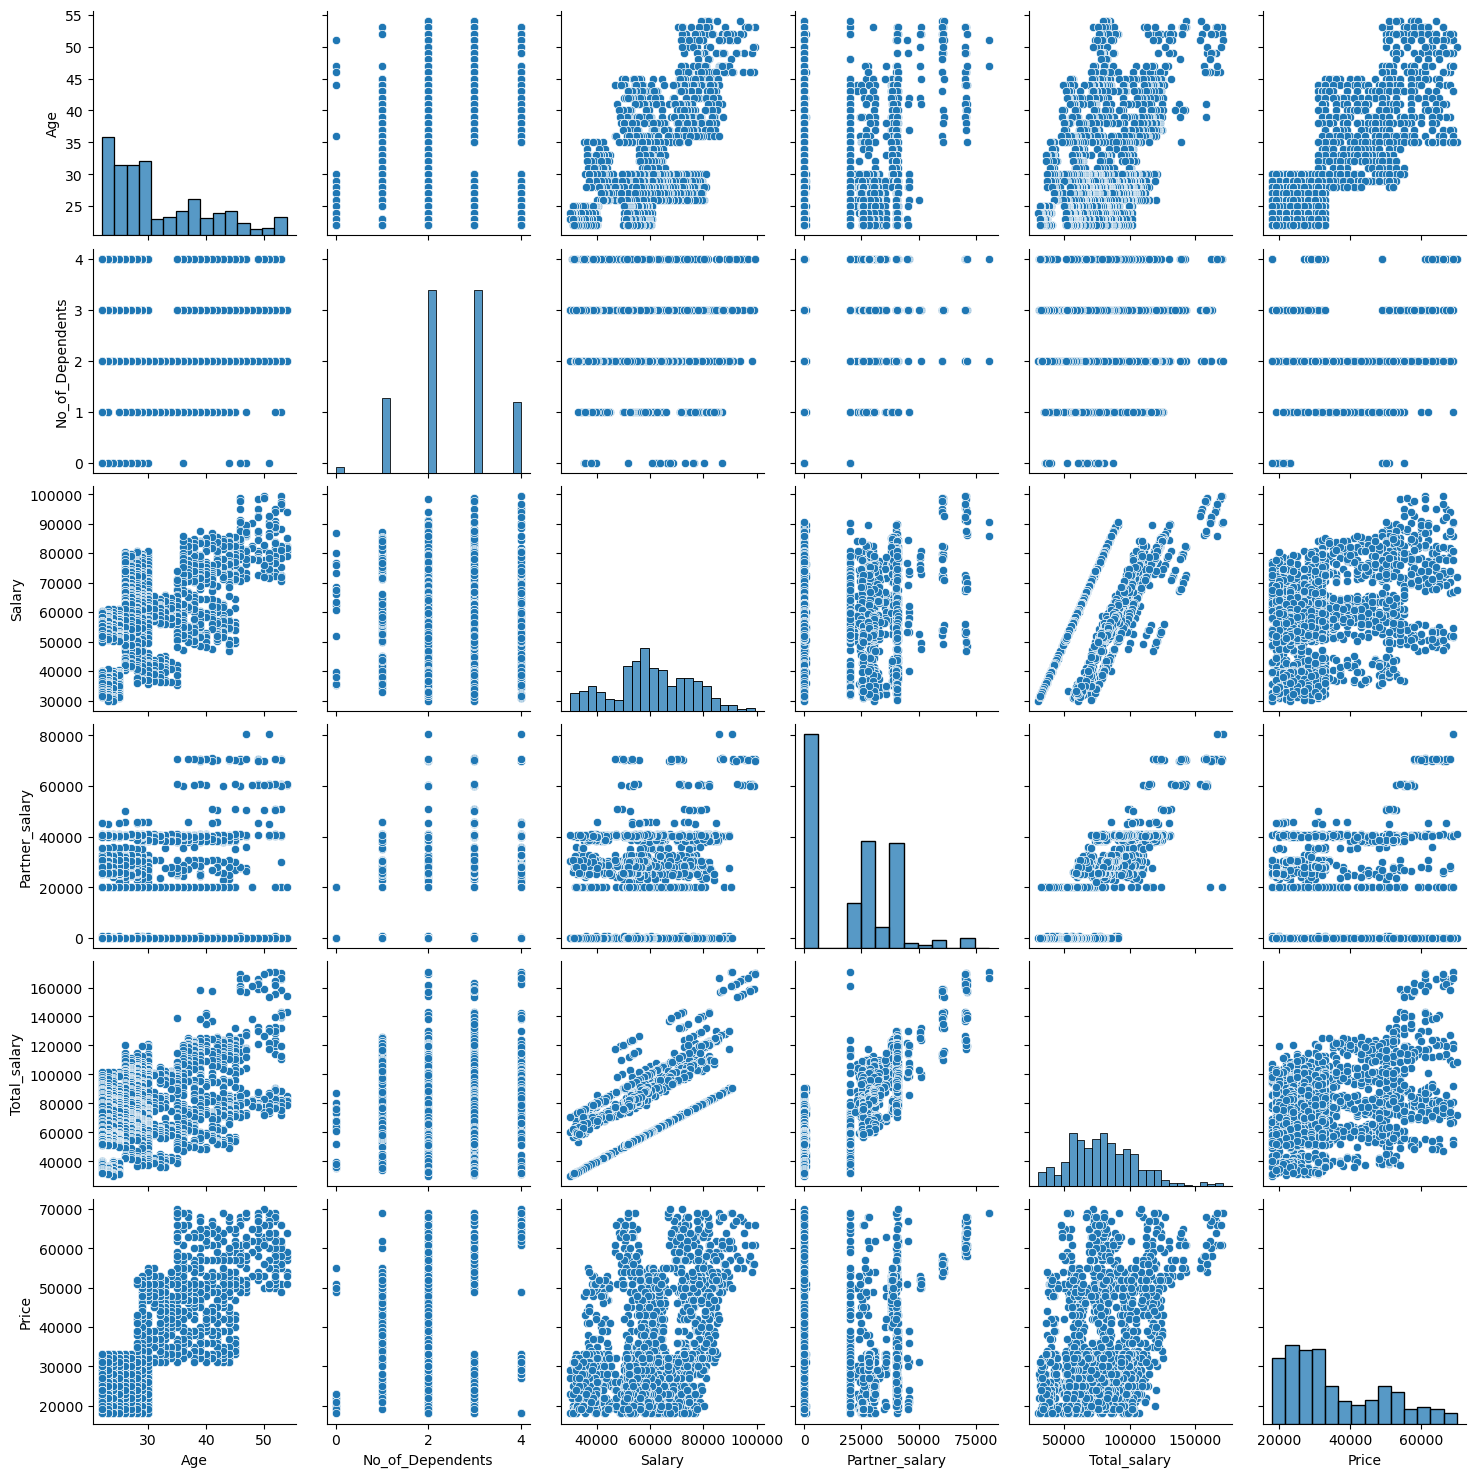

In [153]:
sns.pairplot(data=dfnew)
plt.show()

#Exploring the categorical variables

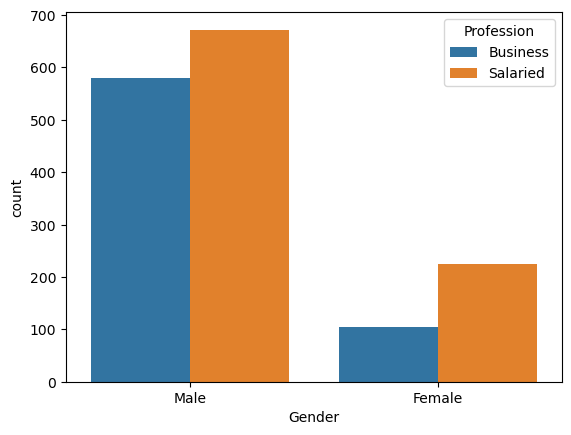

In [157]:
sns.countplot(data=dfnew,x="Gender",hue="Profession")
plt.show()

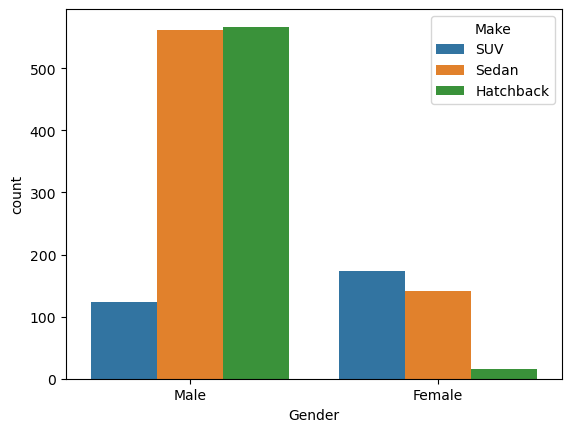

In [160]:
sns.countplot(data=dfnew,x="Gender",hue="Make")
plt.show()

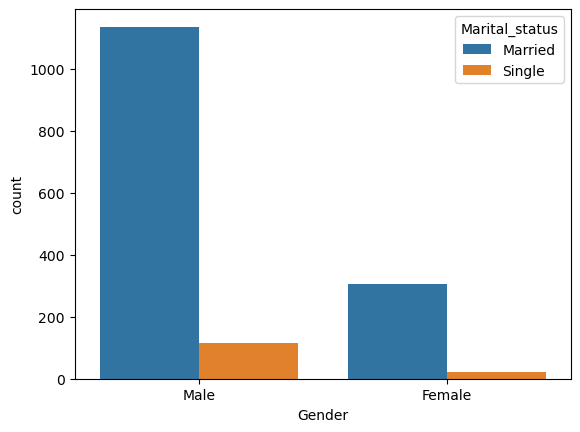

In [161]:
sns.countplot(data=dfnew,x="Gender",hue="Marital_status")
plt.show()

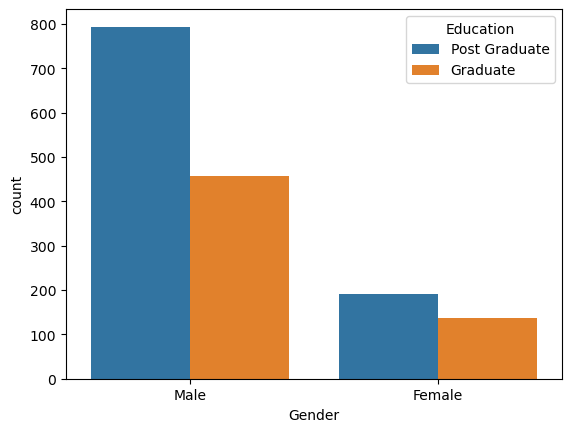

In [164]:
sns.countplot(data=dfnew,x="Gender",hue="Education")
plt.show()

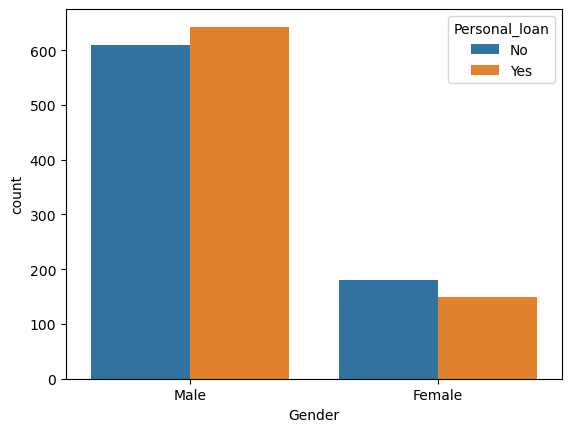

In [166]:
sns.countplot(data=dfnew,x="Gender",hue="Personal_loan")
plt.show()

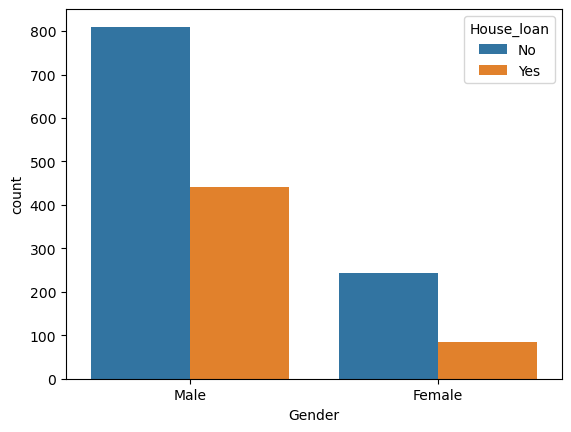

In [168]:
sns.countplot(data=dfnew,x="Gender",hue="House_loan")
plt.show()

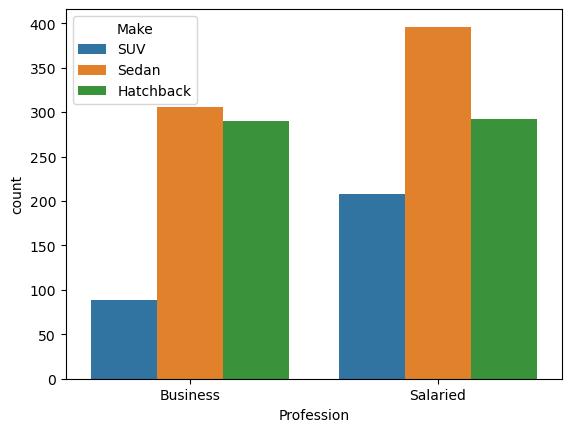

In [169]:
sns.countplot(data=dfnew,x="Profession",hue="Make")
plt.show()

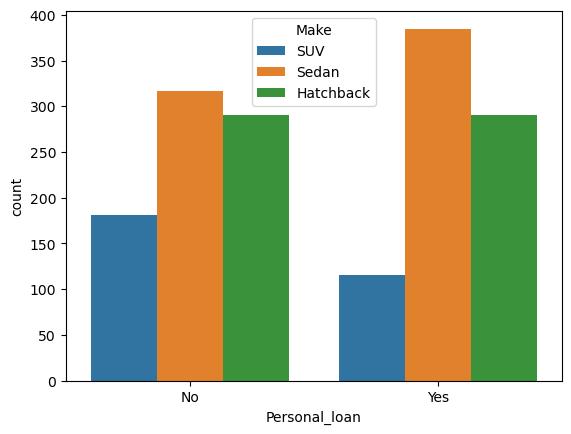

In [172]:
sns.countplot(data=dfnew,x="Personal_loan",hue="Make")
plt.show()

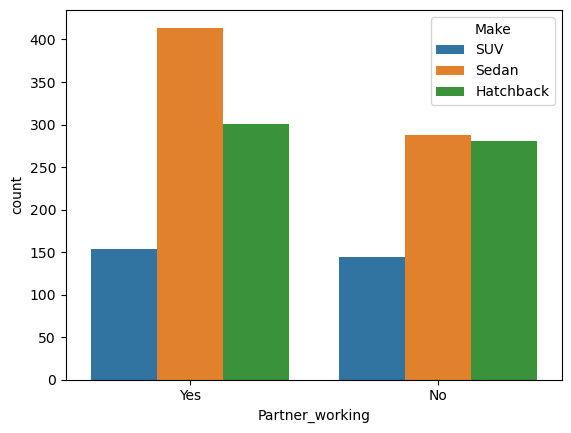

In [174]:
sns.countplot(data=dfnew,x="Partner_working",hue="Make")
plt.show()

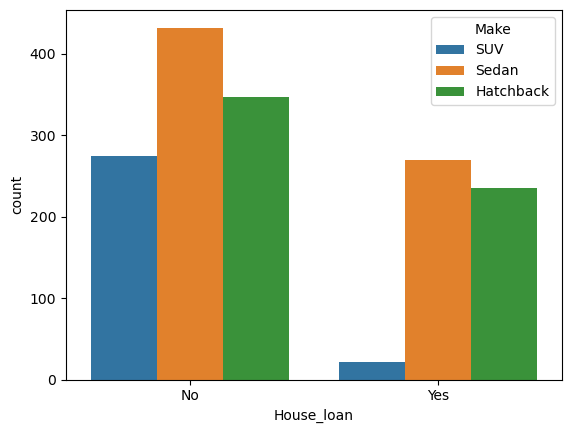

In [176]:
sns.countplot(data=dfnew,x="House_loan",hue="Make")
plt.show()

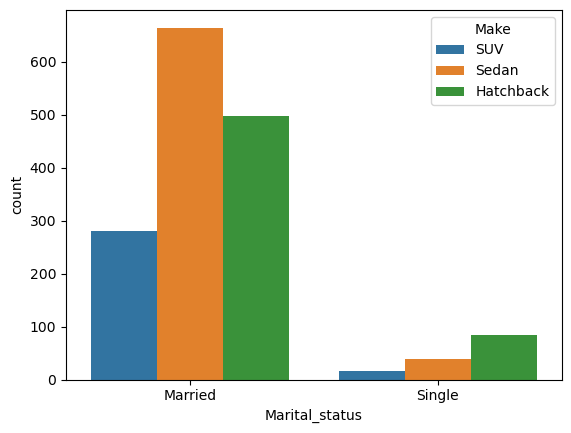

In [177]:
sns.countplot(data=dfnew,x="Marital_status",hue="Make")
plt.show()

#Correlation between all numerical variables

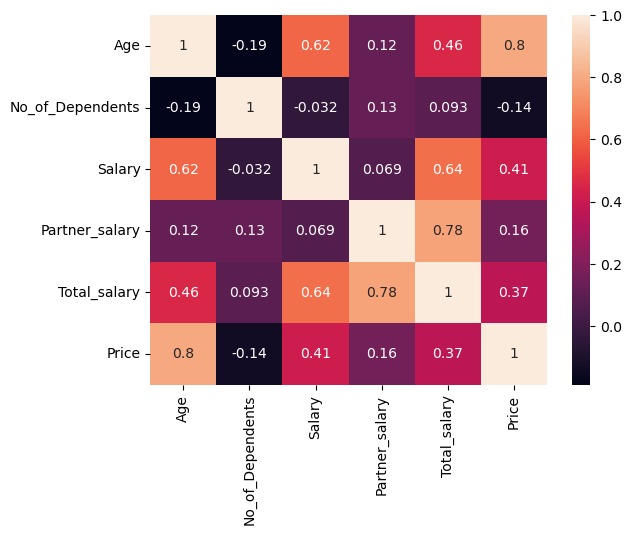

In [180]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

# Exploring the relationship between numerical and categorical variables

C:\Users\ssnan\AppData\Local\Temp\ipykernel_16644\1365745380.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dfnew,x="Price",y="Make",palette="bright")


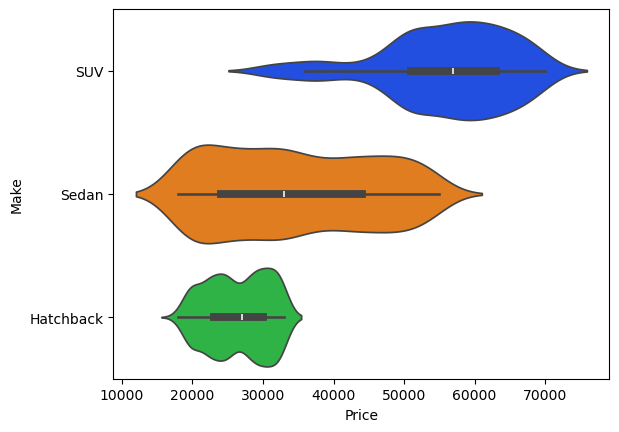

In [183]:
sns.violinplot(data=dfnew,x="Price",y="Make",palette="bright")
plt.show()

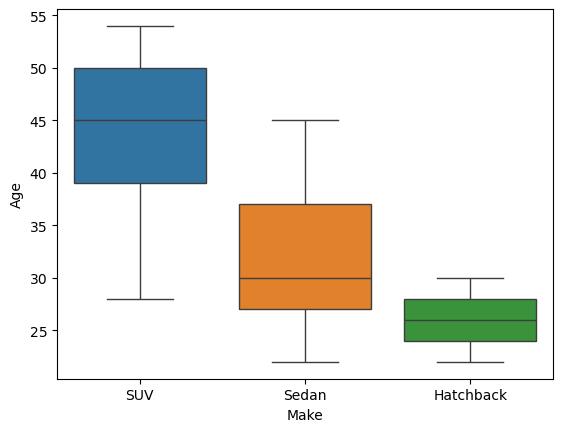

In [184]:
sns.boxplot(data=dfnew,x="Make",y="Age",hue="Make");

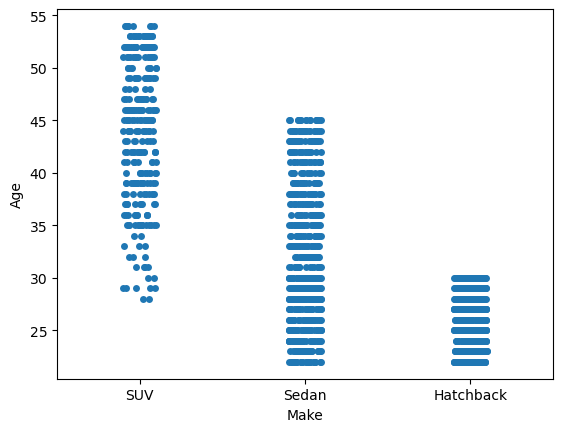

In [185]:
sns.stripplot(data=dfnew,x="Make",y="Age")
plt.show()

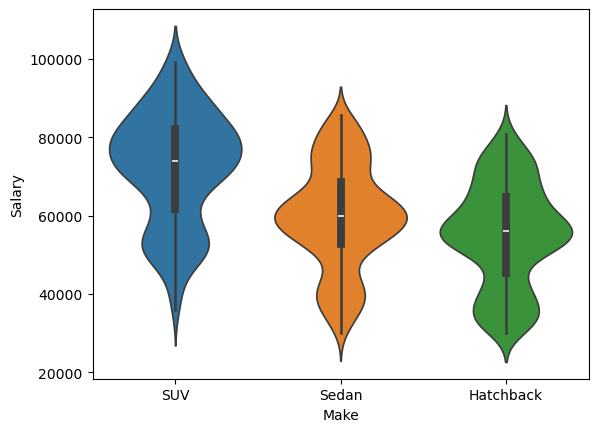

In [186]:
sns.violinplot(data=dfnew,x="Make",y="Salary",hue="Make")
plt.show()

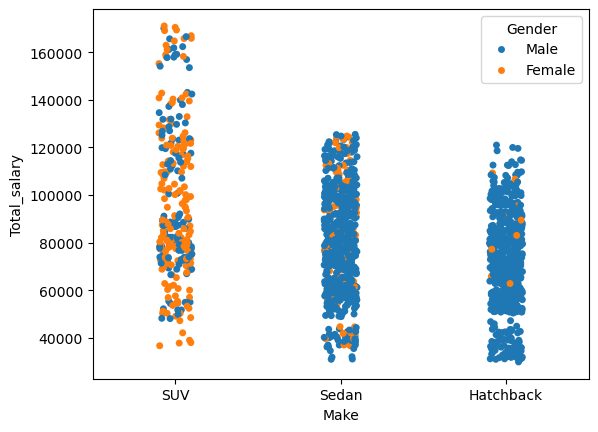

In [187]:
sns.stripplot(data=dfnew,x="Make",y="Total_salary",hue="Gender")
plt.show()

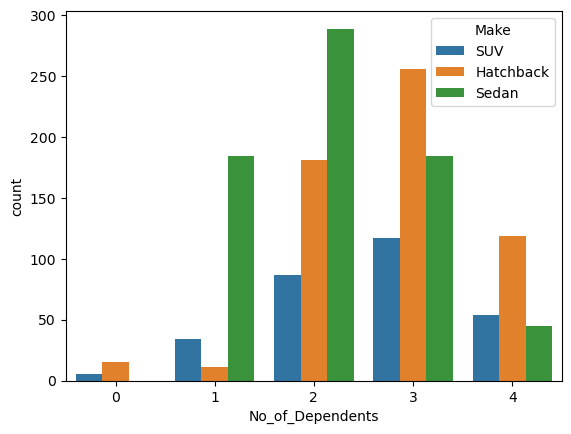

In [188]:
sns.countplot(data=dfnew,x="No_of_Dependents",hue="Make");

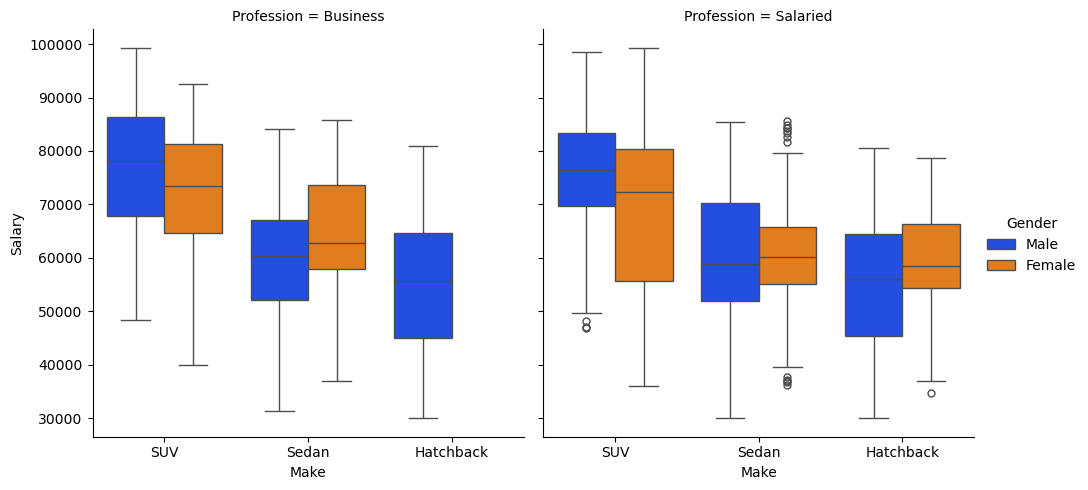

In [189]:
sns.catplot(data=dfnew,x="Make",y="Salary",hue="Gender",col="Profession",kind="box",palette="bright")
plt.show()

C:\Users\ssnan\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ssnan\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ssnan\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ssnan\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 53.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ssnan\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 73.2% of the points

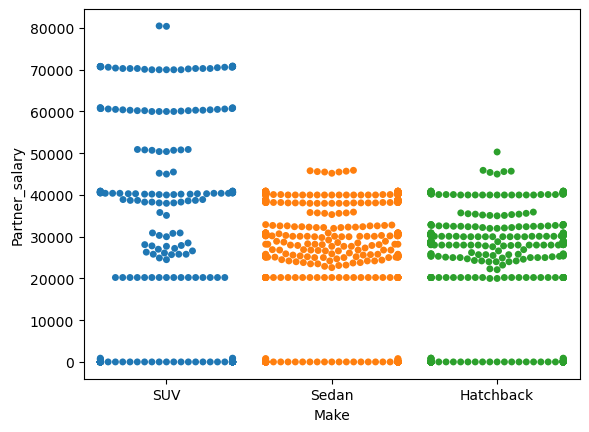

In [191]:
sns.swarmplot(data=dfnew,x="Make",y="Partner_salary",hue="Make");

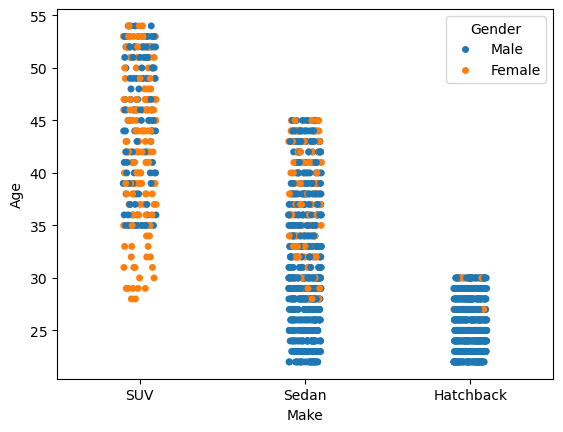

In [193]:
sns.stripplot(data=dfnew,x="Make",y="Age",hue="Gender")
plt.show()

Explore the data to answer the following key questions: 

1. Do men tend to prefer SUVs more compared to women? 

2. What is the likelihood of a salaried person buying a Sedan? 

3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale? 

4. How does the the amount spent on purchasing automobiles vary by gender? 

5. How much money was spent on purchasing automobiles by individuals who took a personal loan? 

6. How does having a working partner influence the purchase of higher-priced cars?


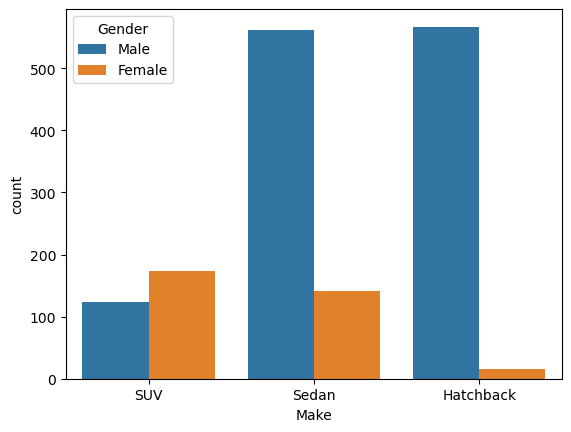

In [195]:
sns.countplot(data=dfnew,x="Make",hue="Gender")
plt.show()

In [196]:
pd.crosstab(dfnew["Gender"],dfnew["Make"],margins=True,normalize=True)

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,0.009488,0.109424,0.089184,0.208096
Male,0.358634,0.078431,0.354839,0.791904
All,0.368121,0.187856,0.444023,1.000000


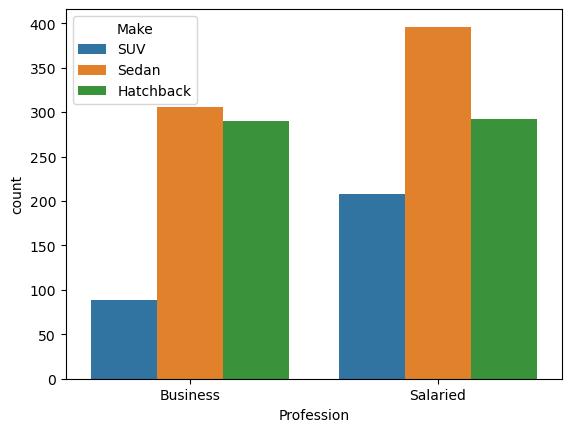

In [197]:
sns.countplot(data=dfnew,x="Profession",hue="Make")
plt.show()

In [198]:
pd.crosstab(dfnew["Profession"],dfnew["Make"],margins=True,normalize=True)

Make,Hatchback,SUV,Sedan,All
Profession,,,,
Business,0.183428,0.056293,0.193548,0.43327
Salaried,0.184693,0.131562,0.250474,0.56673
All,0.368121,0.187856,0.444023,1.00000


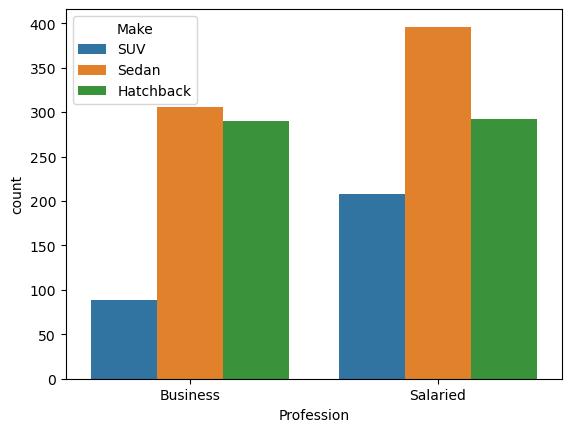

In [199]:
sns.countplot(data=dfnew,x="Profession",hue="Make");

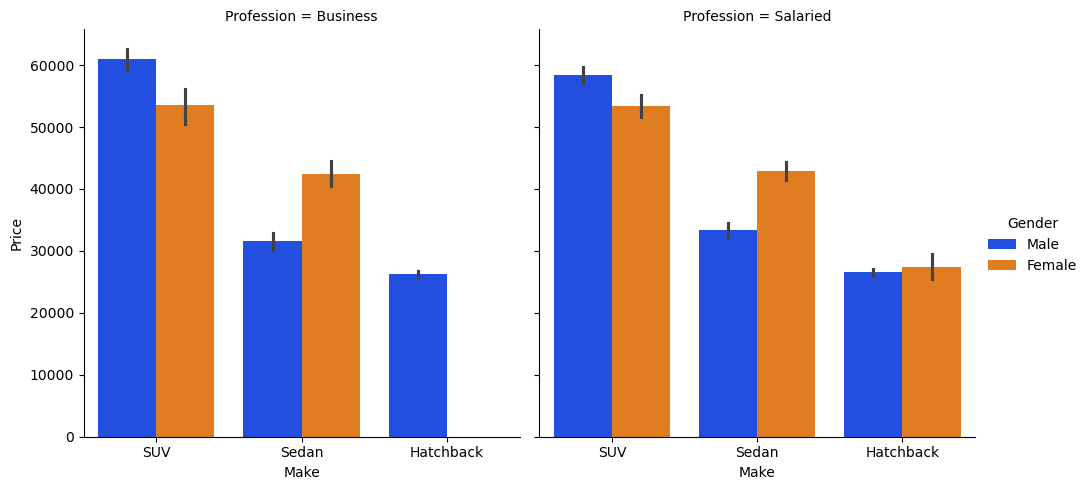

In [201]:
sns.catplot(data=dfnew,x="Make",y="Price",hue="Gender",col="Profession",kind="bar",palette="bright")
plt.show()

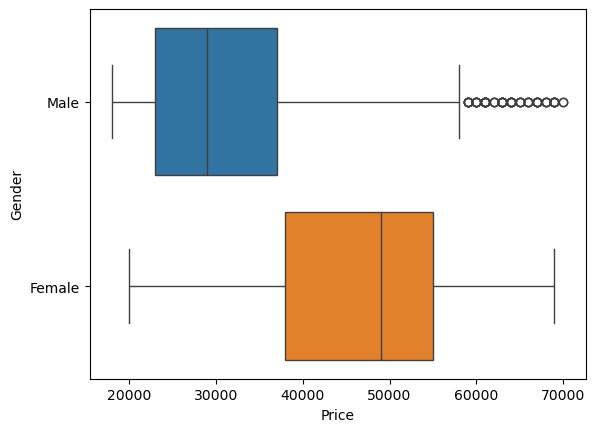

In [202]:
sns.boxplot(data=dfnew,x="Price",y="Gender",hue="Gender");

In [203]:
female_data = dfnew[dfnew['Gender'] == 'Female']

In [204]:
summary_stats = female_data['Price'].describe()

In [205]:
print(summary_stats)

count      329.000000
mean     47705.167173
std      11244.836378
min      20000.000000
25%      38000.000000
50%      49000.000000
75%      55000.000000
max      69000.000000
Name: Price, dtype: float64


In [206]:
male_data = dfnew[dfnew['Gender'] == 'Male']

In [207]:
male_stats = male_data["Price"].describe()

In [208]:
print(male_stats)

count     1252.000000
mean     32416.134185
std      12366.253107
min      18000.000000
25%      23000.000000
50%      29000.000000
75%      37000.000000
max      70000.000000
Name: Price, dtype: float64


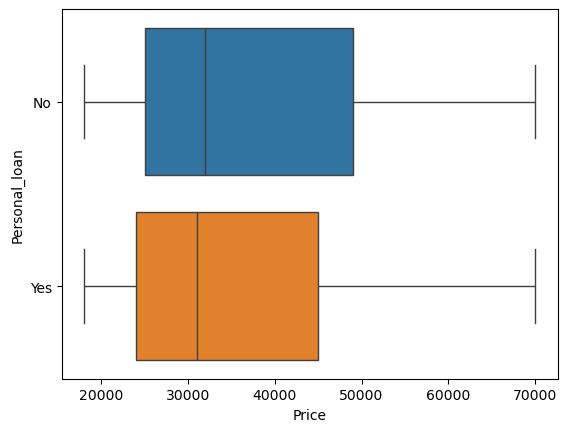

In [209]:
sns.boxplot(data=dfnew,x="Price",y="Personal_loan",hue="Personal_loan");

In [210]:
personal_loantakers = dfnew[dfnew["Personal_loan"]=="Yes"]

In [211]:
summary_loantakers = personal_loantakers["Price"].sum()

In [212]:
print(summary_loantakers)

27290000


In [213]:
non_loantakers = dfnew[dfnew["Personal_loan"]=="No"]

In [214]:
summary_nonloantakers = non_loantakers["Price"].sum()

In [215]:
print(summary_nonloantakers)

28990000


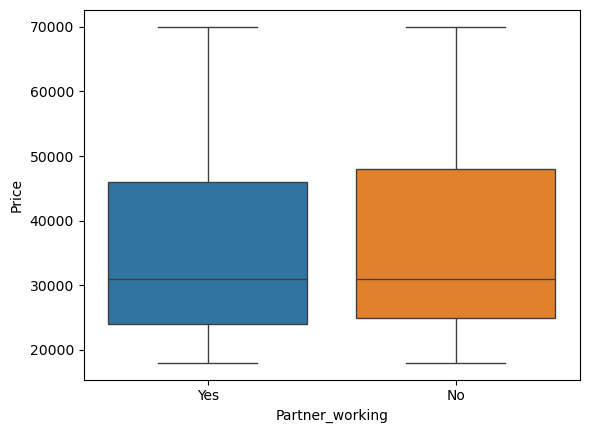

In [216]:
sns.boxplot(data=dfnew,x="Partner_working",y="Price",hue="Partner_working");

In [217]:
working = dfnew[dfnew["Partner_working"]=="Yes"]

In [218]:
summary_working = working["Price"].describe()

In [219]:
print(summary_working)

count      868.000000
mean     35267.281106
std      13479.532555
min      18000.000000
25%      24000.000000
50%      31000.000000
75%      46000.000000
max      70000.000000
Name: Price, dtype: float64


In [220]:
nworking = dfnew[dfnew["Partner_working"]=="No"]

In [221]:
summary_nworking =nworking["Price"].describe()

In [222]:
print(summary_nworking)

count      713.000000
mean     36000.000000
std      13817.734086
min      18000.000000
25%      25000.000000
50%      31000.000000
75%      48000.000000
max      70000.000000
Name: Price, dtype: float64


Thankyou!